In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepanshuverma0154/sales-dataset-of-ecommerce-electronic-products")

print("Path to dataset files:", path)

100%|██████████| 2.78M/2.78M [00:00<00:00, 104MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/deepanshuverma0154/sales-dataset-of-ecommerce-electronic-products/versions/1


In [2]:
import numpy as np
import pandas as pd
import os

csv_path = os.path.join(path, "Updated_sales.csv")
df = pd.read_csv(csv_path)

### **Data Cleaning and EDA Using Pandas & Matplotlib**

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
sales = df.copy()

In [7]:
sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [9]:
sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,30307,30307,30307,30307,30307,30307
unique,29019,20,9,24,23316,27854
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,61,3556,27405,3556,61,61


In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30394 entries, 0 to 30393
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          30307 non-null  object
 1   Product           30307 non-null  object
 2   Quantity Ordered  30307 non-null  object
 3   Price Each        30307 non-null  object
 4   Order Date        30307 non-null  object
 5   Purchase Address  30307 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [13]:
sales.shape

(30394, 6)

### **Finding Data Type of Each Column**

In [29]:
print(sales.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


In [36]:
sales['Product'].value_counts()

,count
Product,
Lightning Charging Cable,3556
USB-C Charging Cable,3423
AA Batteries (4-pack),3419
AAA Batteries (4-pack),3329
Wired Headphones,3082
Apple Airpods Headphones,2515
Bose SoundSport Headphones,2151
27in FHD Monitor,1220
iPhone,1131


In [42]:
sales[sales['Product'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
28132,NaN,NaN,NaN,NaN,NaN,NaN
28879,NaN,NaN,NaN,NaN,NaN,NaN
29097,NaN,NaN,NaN,NaN,NaN,NaN
29247,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
sales.isnull().sum()

,0
Order ID,87
Product,87
Quantity Ordered,87
Price Each,87
Order Date,87
Purchase Address,87


### **Remove Nan Values from Dataset**

In [51]:
before = sales.isnull().sum()

In [50]:
before

,0
Order ID,87
Product,87
Quantity Ordered,87
Price Each,87
Order Date,87
Purchase Address,87


In [56]:
sales = sales.dropna()

In [57]:
after = sales.isnull().sum()
after

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [61]:
sales['Price Each'].value_counts()

,count
Price Each,
14.95,3556
11.95,3423
3.84,3419
2.99,3329
11.99,3082
150,2492
99.99,2151
149.99,1220
700,1126


In [63]:
sales['Price Each'].dtype

dtype('O')

In [65]:
sales['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [67]:
sales['Price Each'] = pd.to_numeric(sales['Price Each'], errors='coerce')

/tmp/ipython-input-2996770705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Price Each'] = pd.to_numeric(sales['Price Each'], errors='coerce')


In [69]:
sales['Price Each'].value_counts()

,count
Price Each,
14.95,3556
11.95,3423
3.84,3419
2.99,3329
11.99,3082
150.00,2515
99.99,2151
149.99,1220
600.00,1171


In [71]:
sales['Price Each'].isnull().sum()

np.int64(61)

In [73]:
sales['Price Each'].unique()

array([  11.95,   99.99,  600.  ,   11.99, 1700.  ,   14.95,  389.99,
          3.84,  150.  ,    2.99,  700.  ,  300.  ,  149.99,  109.99,
        999.99,  400.  ,  379.99,     nan])

In [77]:
sales = sales[sales['Price Each'] != 'Price Each']

In [78]:
sales['Price Each'] = pd.to_numeric(sales['Price Each'], errors='coerce')

In [80]:
sales = sales.dropna(subset=['Price Each'])

In [83]:
sales['Price Each'].value_counts()

,count
Price Each,
14.95,3556
11.95,3423
3.84,3419
2.99,3329
11.99,3082
150.00,2515
99.99,2151
149.99,1220
600.00,1171


In [84]:
sales['Price Each'].isnull().sum()

np.int64(0)

### **Feature Engineering**

In [87]:
sales['Order Date'].value_counts()

,count
Order Date,
04/02/19 13:24,7
04/11/19 17:48,6
04/04/19 11:09,6
04/08/19 13:26,6
04/25/19 19:01,6
...,...
08/29/19 22:19,1
08/22/19 15:10,1
08/04/19 20:45,1


In [89]:
sales['Order Date']

,Order Date
0,04/19/19 08:46
2,04/07/19 22:30
3,04/12/19 14:38
4,04/12/19 14:38
5,04/30/19 09:27
...,...
30389,08/29/19 22:19
30390,08/31/19 16:26
30391,08/02/19 07:25
30392,08/08/19 12:10


In [90]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'],errors='coerce')


/tmp/ipython-input-2151251540.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Order Date'] = pd.to_datetime(sales['Order Date'],errors='coerce')


In [91]:
sales = sales.dropna(subset=['Order Date'])

In [92]:
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month
sales['Hour'] = sales['Order Date'].dt.hour
sales['Day'] = sales['Order Date'].dt.day

In [95]:
sales[['Year', 'Month', 'Hour', 'Day']]

,Year,Month,Hour,Day
0,2019,4,8,19
2,2019,4,22,7
3,2019,4,14,12
4,2019,4,14,12
5,2019,4,9,30
...,...,...,...,...
30389,2019,8,22,29
30390,2019,8,16,31
30391,2019,8,7,2
30392,2019,8,12,8


In [97]:
sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Year', 'Month', 'Hour', 'Day'],
      dtype='object')

In [99]:
sales = sales.drop(columns=['Order Date'])

In [102]:
sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Purchase Address', 'Year', 'Month', 'Hour', 'Day'],
      dtype='object')

In [104]:
sales['Quantity Ordered'].value_counts()

,count
Quantity Ordered,
1,27405
2,2184
3,472
4,128
5,40
6,11
7,5
8,1


In [105]:
sales['Quantity Ordered'].isnull().sum()

np.int64(0)

In [106]:
sales['Purchase Address'].value_counts()

,count
Purchase Address,
"957 South St, San Francisco, CA 94016",4
"821 Elm St, Austin, TX 73301",4
"842 Meadow St, Los Angeles, CA 90001",4
"197 Center St, San Francisco, CA 94016",4
"984 14th St, Austin, TX 73301",4
...,...
"689 4th St, San Francisco, CA 94016",1
"659 11th St, New York City, NY 10001",1
"647 Lincoln St, San Francisco, CA 94016",1


In [107]:
sales['City'] = sales['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

sales['State'] = sales['Purchase Address'].apply(lambda x: x.split(',')[2].split()[0].strip())


In [110]:
sales[['City', 'State']]

,City,State
0,Dallas,TX
2,Boston,MA
3,Los Angeles,CA
4,Los Angeles,CA
5,Los Angeles,CA
...,...,...
30389,San Francisco,CA
30390,Boston,MA
30391,Seattle,WA
30392,San Francisco,CA


In [111]:
sales.drop(columns=['Purchase Address'])

,Order ID,Product,Quantity Ordered,Price Each,Year,Month,Hour,Day,City,State
0,176558,USB-C Charging Cable,2,11.95,2019,4,8,19,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019,4,22,7,Boston,MA
3,176560,Google Phone,1,600.00,2019,4,14,12,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019,4,14,12,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019,4,9,30,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,2019,8,22,29,San Francisco,CA
30390,248147,AAA Batteries (4-pack),3,2.99,2019,8,16,31,Boston,MA
30391,248148,AA Batteries (4-pack),1,3.84,2019,8,7,2,Seattle,WA
30392,248149,USB-C Charging Cable,1,11.95,2019,8,12,8,San Francisco,CA


In [113]:
sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Purchase Address', 'Year', 'Month', 'Hour', 'Day', 'City', 'State'],
      dtype='object')

In [116]:
sales['Quantity Ordered'].isnull().sum()

np.int64(0)

In [119]:
sales['Quantity Ordered'].value_counts()

,count
Quantity Ordered,
1,27405
2,2184
3,472
4,128
5,40
6,11
7,5
8,1


In [123]:
sales['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8'], dtype=object)

In [125]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors='coerce')

In [127]:
sales['Quantity Ordered'].dtype

dtype('int64')

In [129]:
sales.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Purchase Address,0
Year,0
Month,0
Hour,0
Day,0
City,0


In [132]:
print(sales.dtypes)

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Purchase Address     object
Year                  int32
Month                 int32
Hour                  int32
Day                   int32
City                 object
State                object
dtype: object


In [134]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Year,Month,Hour,Day,City,State
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019,4,8,19,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019,4,22,7,Boston,MA
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,12,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,12,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019,4,9,30,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,"868 Hickory St, San Francisco, CA 94016",2019,8,22,29,San Francisco,CA
30390,248147,AAA Batteries (4-pack),3,2.99,"206 Lakeview St, Boston, MA 02215",2019,8,16,31,Boston,MA
30391,248148,AA Batteries (4-pack),1,3.84,"568 13th St, Seattle, WA 98101",2019,8,7,2,Seattle,WA
30392,248149,USB-C Charging Cable,1,11.95,"495 Walnut St, San Francisco, CA 94016",2019,8,12,8,San Francisco,CA


In [136]:
sales.shape

(30246, 11)

In [138]:
sales['Price Each'].describe()

,Price Each
count,30246.000000
mean,185.259397
std,331.459098
min,2.990000
25%,11.950000
50%,14.950000
75%,150.000000
max,1700.000000


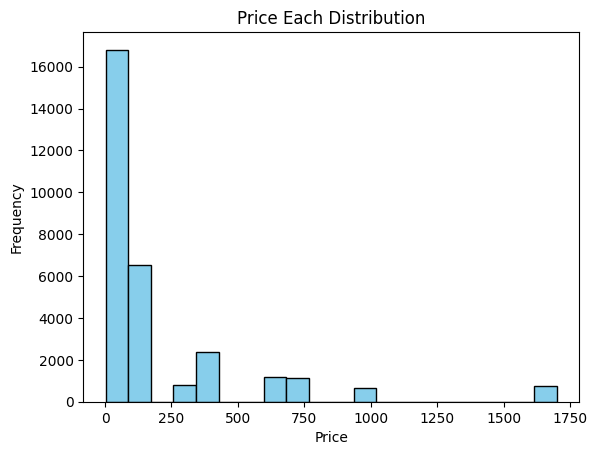

In [139]:
import matplotlib.pyplot as plt

plt.hist(sales['Price Each'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Each Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [154]:
quantity_per_city = sales.groupby('City')['Quantity Ordered'].sum()

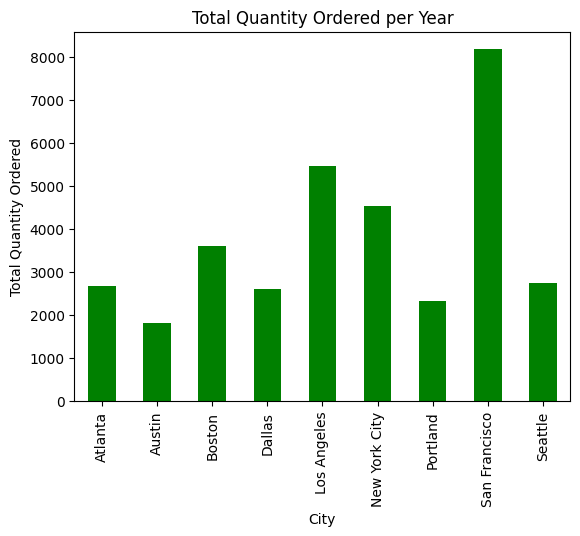

In [155]:
quantity_per_city.plot(kind='bar', color='green')
plt.title('City Wise Total Quantity Ordered')
plt.xlabel('City')
plt.ylabel('Total Quantity Ordered')
plt.show()

In [156]:
quantity_per_state = sales.groupby('State')['Quantity Ordered'].sum()

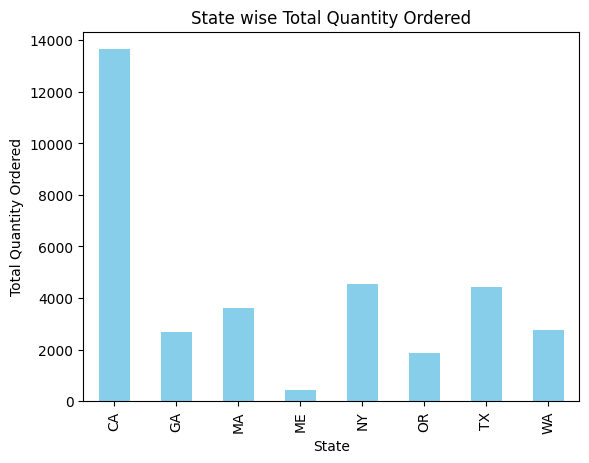

In [159]:
quantity_per_state.plot(kind='bar', color='skyblue')
plt.title('State wise Total Quantity Ordered')
plt.xlabel('State')
plt.ylabel('Total Quantity Ordered')
plt.show()

In [161]:
sales['Price Each'].max()

1700.0

In [162]:
sales['Price Each'].min()

2.99

In [164]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Year,Month,Hour,Day,City,State
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019,4,8,19,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019,4,22,7,Boston,MA
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,12,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,12,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019,4,9,30,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,"868 Hickory St, San Francisco, CA 94016",2019,8,22,29,San Francisco,CA
30390,248147,AAA Batteries (4-pack),3,2.99,"206 Lakeview St, Boston, MA 02215",2019,8,16,31,Boston,MA
30391,248148,AA Batteries (4-pack),1,3.84,"568 13th St, Seattle, WA 98101",2019,8,7,2,Seattle,WA
30392,248149,USB-C Charging Cable,1,11.95,"495 Walnut St, San Francisco, CA 94016",2019,8,12,8,San Francisco,CA


In [171]:
oder_quantity_per_product = sales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
oder_quantity_per_product

,Quantity Ordered
Product,
AAA Batteries (4-pack),4955
AA Batteries (4-pack),4648
Lightning Charging Cable,3812
USB-C Charging Cable,3732
Wired Headphones,3356
Apple Airpods Headphones,2535
Bose SoundSport Headphones,2168
27in FHD Monitor,1229
iPhone,1133


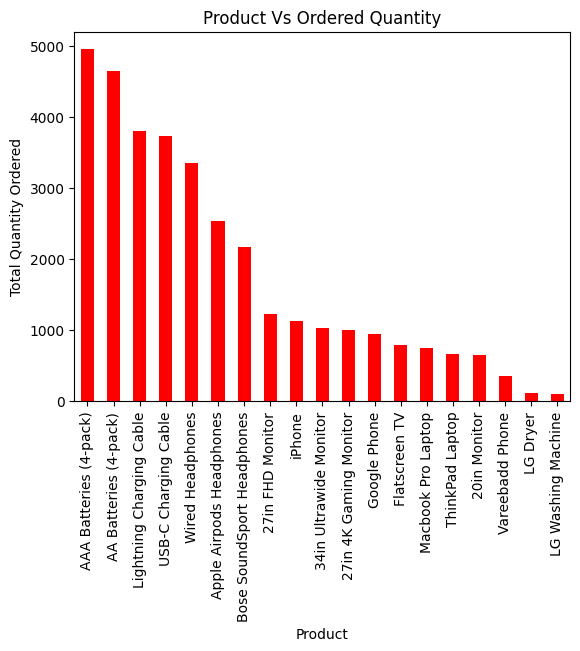

In [188]:
oder_quantity_per_product.plot(kind='bar', color='red')
plt.title('Product Vs Ordered Quantity')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.show()

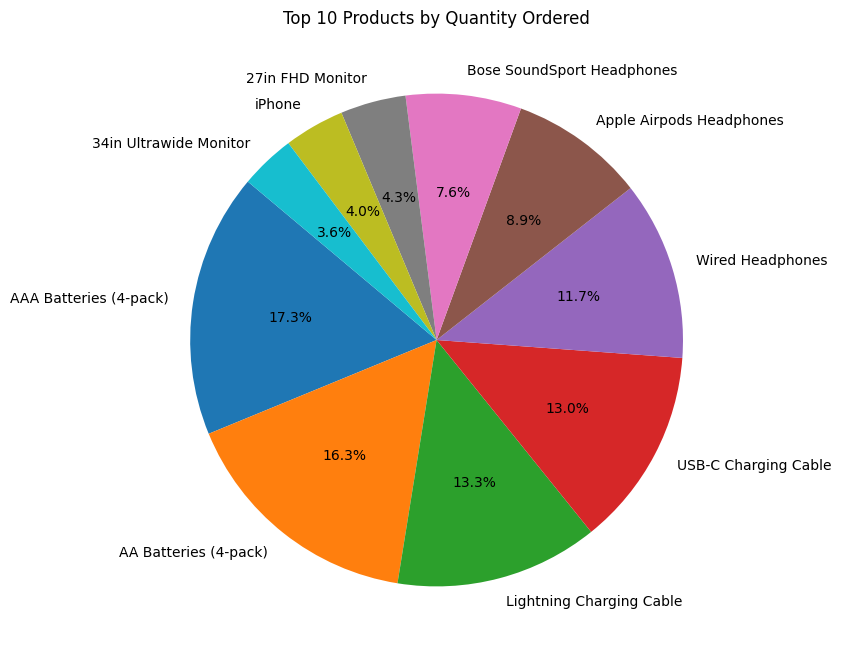

In [198]:
top_products = oder_quantity_per_product.head(10)
plt.figure(figsize=(8,8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Products by Quantity Ordered')
plt.show()

In [189]:
product_counts = sales['Product'].value_counts()
product_counts

,count
Product,
Lightning Charging Cable,3556
USB-C Charging Cable,3423
AA Batteries (4-pack),3419
AAA Batteries (4-pack),3329
Wired Headphones,3082
Apple Airpods Headphones,2515
Bose SoundSport Headphones,2151
27in FHD Monitor,1220
iPhone,1131


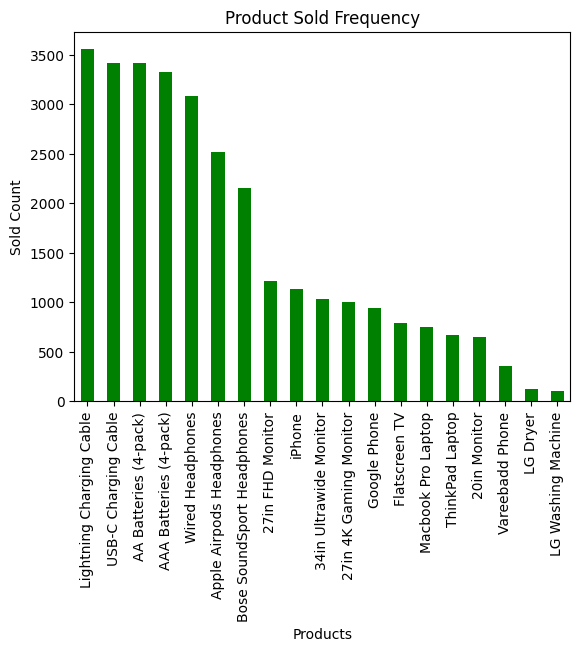

In [190]:
product_counts.plot(kind='bar', color='green')
plt.title('Product Sold Frequency')
plt.xlabel('Products')
plt.ylabel('Sold Count')
plt.show()

In [202]:
sales['Date Time'] = sales.apply(
    lambda row: pd.Timestamp(
        year=row['Year'],
        month=row['Month'],
        day=row['Day'],
        hour=row['Hour']
    ),
    axis=1
)


In [203]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Year,Month,Hour,Day,City,State,Date Time
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019,4,8,19,Dallas,TX,2019-04-19 08:00:00
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019,4,22,7,Boston,MA,2019-04-07 22:00:00
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,12,Los Angeles,CA,2019-04-12 14:00:00
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,12,Los Angeles,CA,2019-04-12 14:00:00
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019,4,9,30,Los Angeles,CA,2019-04-30 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,"868 Hickory St, San Francisco, CA 94016",2019,8,22,29,San Francisco,CA,2019-08-29 22:00:00
30390,248147,AAA Batteries (4-pack),3,2.99,"206 Lakeview St, Boston, MA 02215",2019,8,16,31,Boston,MA,2019-08-31 16:00:00
30391,248148,AA Batteries (4-pack),1,3.84,"568 13th St, Seattle, WA 98101",2019,8,7,2,Seattle,WA,2019-08-02 07:00:00
30392,248149,USB-C Charging Cable,1,11.95,"495 Walnut St, San Francisco, CA 94016",2019,8,12,8,San Francisco,CA,2019-08-08 12:00:00


In [207]:
sales['Sales'] = sales['Quantity Ordered'] * sales['Price Each']

In [211]:
daily_sales = sales.groupby(sales['Date Time'].dt.date)['Sales'].sum()
daily_sales


,Sales
Date Time,
2019-04-01,107527.34
2019-04-02,104496.71
2019-04-03,113611.75
2019-04-04,116214.99
2019-04-05,114012.88
...,...
2019-08-28,75286.79
2019-08-29,73259.51
2019-08-30,65785.16


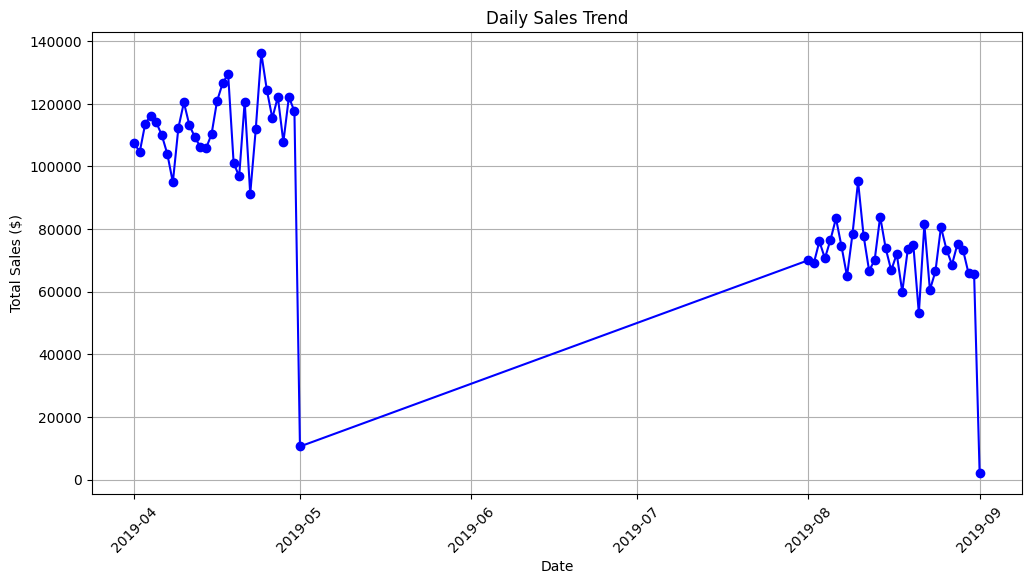

In [213]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()